In [6]:
from tensorflow.keras.layers import BatchNormalization,Dense, Flatten , Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
import numpy as np
import matplotlib.pyplot as plt

/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:98: UserWarning: unable to load libtensorflow_io_plugins.so: unable to open file: libtensorflow_io_plugins.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so: undefined symbol: _ZN3tsl6StatusC1EN10tensorflow5error4CodeESt17basic_string_viewIcSt11char_traitsIcEENS_14SourceLocationE']
  warnings.warn(f"unable to load libtensorflow_io_plugins.so: {e}")
/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:104: UserWarning: file system plugins are not loaded: unable to open file: libtensorflow_io.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io.so: undefined symbol: _ZTVN10tenso

glioma_tumor


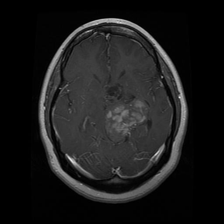

In [10]:
import PIL 
print('glioma_tumor')
PIL.Image.open("/kaggle/input/merged/Merged/glioma_tumor/gg (1).jpg").resize((224, 224))

meningioma_tumor


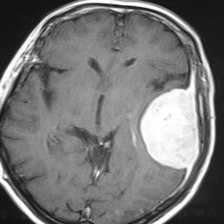

In [20]:
print('meningioma_tumor')
PIL.Image.open("/kaggle/input/merged/Merged/meningioma_tumor/image(120).jpg").resize((224, 224))

no_tumor


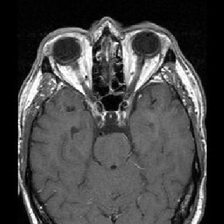

In [21]:
print('no_tumor')
PIL.Image.open("/kaggle/input/merged/Merged/no_tumor/1.jpg").resize((224, 224))

pituitary_tumor


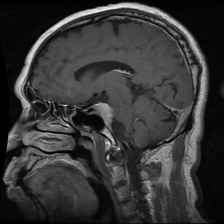

In [22]:
print('pituitary_tumor')
PIL.Image.open("/kaggle/input/merged/Merged/pituitary_tumor/image(1).jpg").resize((224, 224))

In [52]:
IMAGE_SIZE = [224, 224]
path = '/kaggle/input/merged/Merged'

In [53]:
# Train Test Split
!pip install split-folders
import splitfolders

In [54]:
splitfolders.ratio(path, output="output",
    seed=1337, ratio=(.8, .2), group_prefix=None, move=False)

Copying files: 3160 files [00:04, 690.80 files/s] 


In [55]:
# add preprocessing layer to the front of Inception
r = InceptionV3(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

In [56]:
# don't train existing weights
for layer in r.layers:
  layer.trainable = False

In [57]:
# our layers - you can add more if you want
x = Flatten()(r.output)
x = Dense(128,activation='relu')(x)
x = BatchNormalization()(x)
x = Dense(128,activation='relu')(x)
x = BatchNormalization()(x)
x = Dense(128,activation='relu')(x)
x = BatchNormalization()(x)
x = Dense(128,activation='relu')(x)
x = BatchNormalization()(x)
prediction = Dense(4, activation='softmax')(x)

In [58]:
# create a model object
model = Model(inputs=r.input, outputs=prediction)

# view the structure of the model
# model.summary()

In [59]:
# tell the model what cost and optimization method to use
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [60]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

training_set = train_datagen.flow_from_directory('/kaggle/working/output/train',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

test_set = test_datagen.flow_from_directory('/kaggle/working/output/val',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 2525 images belonging to 4 classes.
Found 635 images belonging to 4 classes.


In [61]:
from tensorflow import keras
early_stop=keras.callbacks.EarlyStopping(monitor='val_loss',patience=10)

In [62]:
# fit the model
r = model.fit(
  training_set,
  validation_data=test_set,
  epochs=50,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set),
  callbacks=[early_stop]
)

Epoch 1/50
79/79 [==============================] - 43s 448ms/step - loss: 0.8278 - accuracy: 0.6855 - val_loss: 1.0911 - val_accuracy: 0.5260
Epoch 2/50
79/79 [==============================] - 34s 425ms/step - loss: 0.4886 - accuracy: 0.8226 - val_loss: 0.6990 - val_accuracy: 0.7228
Epoch 3/50
79/79 [==============================] - 33s 421ms/step - loss: 0.3851 - accuracy: 0.8606 - val_loss: 0.3946 - val_accuracy: 0.8598
Epoch 4/50
79/79 [==============================] - 33s 420ms/step - loss: 0.3335 - accuracy: 0.8776 - val_loss: 0.3390 - val_accuracy: 0.8866
Epoch 5/50
79/79 [==============================] - 34s 425ms/step - loss: 0.2723 - accuracy: 0.9053 - val_loss: 0.3795 - val_accuracy: 0.8630
Epoch 6/50
79/79 [==============================] - 33s 421ms/step - loss: 0.2220 - accuracy: 0.9220 - val_loss: 0.3450 - val_accuracy: 0.8772
Epoch 7/50
79/79 [==============================] - 34s 430ms/step - loss: 0.2304 - accuracy: 0.9184 - val_loss: 0.3384 - val_accuracy: 0.8866

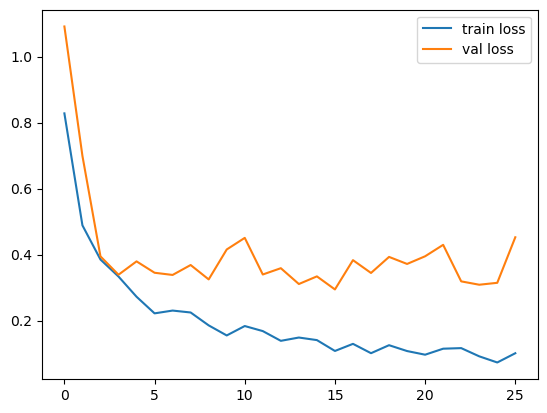

<Figure size 640x480 with 0 Axes>

In [63]:
# loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

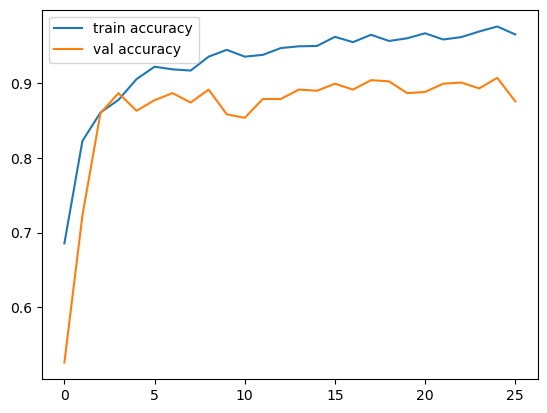

<Figure size 640x480 with 0 Axes>

In [64]:
# accuracies
plt.plot(r.history['accuracy'], label='train accuracy')
plt.plot(r.history['val_accuracy'], label='val accuracy')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [72]:
from keras.models import load_model
model.save('model.h5')

In [74]:
test_score = model.evaluate_generator(test_set, 32)
print("[INFO] accuracy: {:.2f}%".format(test_score[1] * 100))
print("[INFO] Loss: ",test_score[0])

/tmp/ipykernel_29/1753864568.py:1: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  test_score = model.evaluate_generator(test_set, 32)


[INFO] accuracy: 87.56%
[INFO] Loss:  0.45252954959869385


In [75]:
classes = ["glioma_tumor","meningioma_tumor","no_tumor","pituitary_tumor"]

In [76]:
def plot_confusion_matrix(cm, classes, normalize=True, title='Confusion matrix', cmap=plt.cm.OrRd):
    
    plt.figure(figsize=(20,20))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        cm = np.around(cm, decimals=2)
        cm[np.isnan(cm)] = 0.0
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

/tmp/ipykernel_29/2767619060.py:8: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  Y_pred = model.predict_generator(test_set)


Confusion Matrix
Normalized confusion matrix
Classification Report
                  precision    recall  f1-score   support

    glioma_tumor       0.32      0.24      0.28       186
meningioma_tumor       0.30      0.36      0.33       188
        no_tumor       0.12      0.11      0.12        80
 pituitary_tumor       0.32      0.34      0.33       181

        accuracy                           0.29       635
       macro avg       0.26      0.26      0.26       635
    weighted avg       0.29      0.29      0.29       635



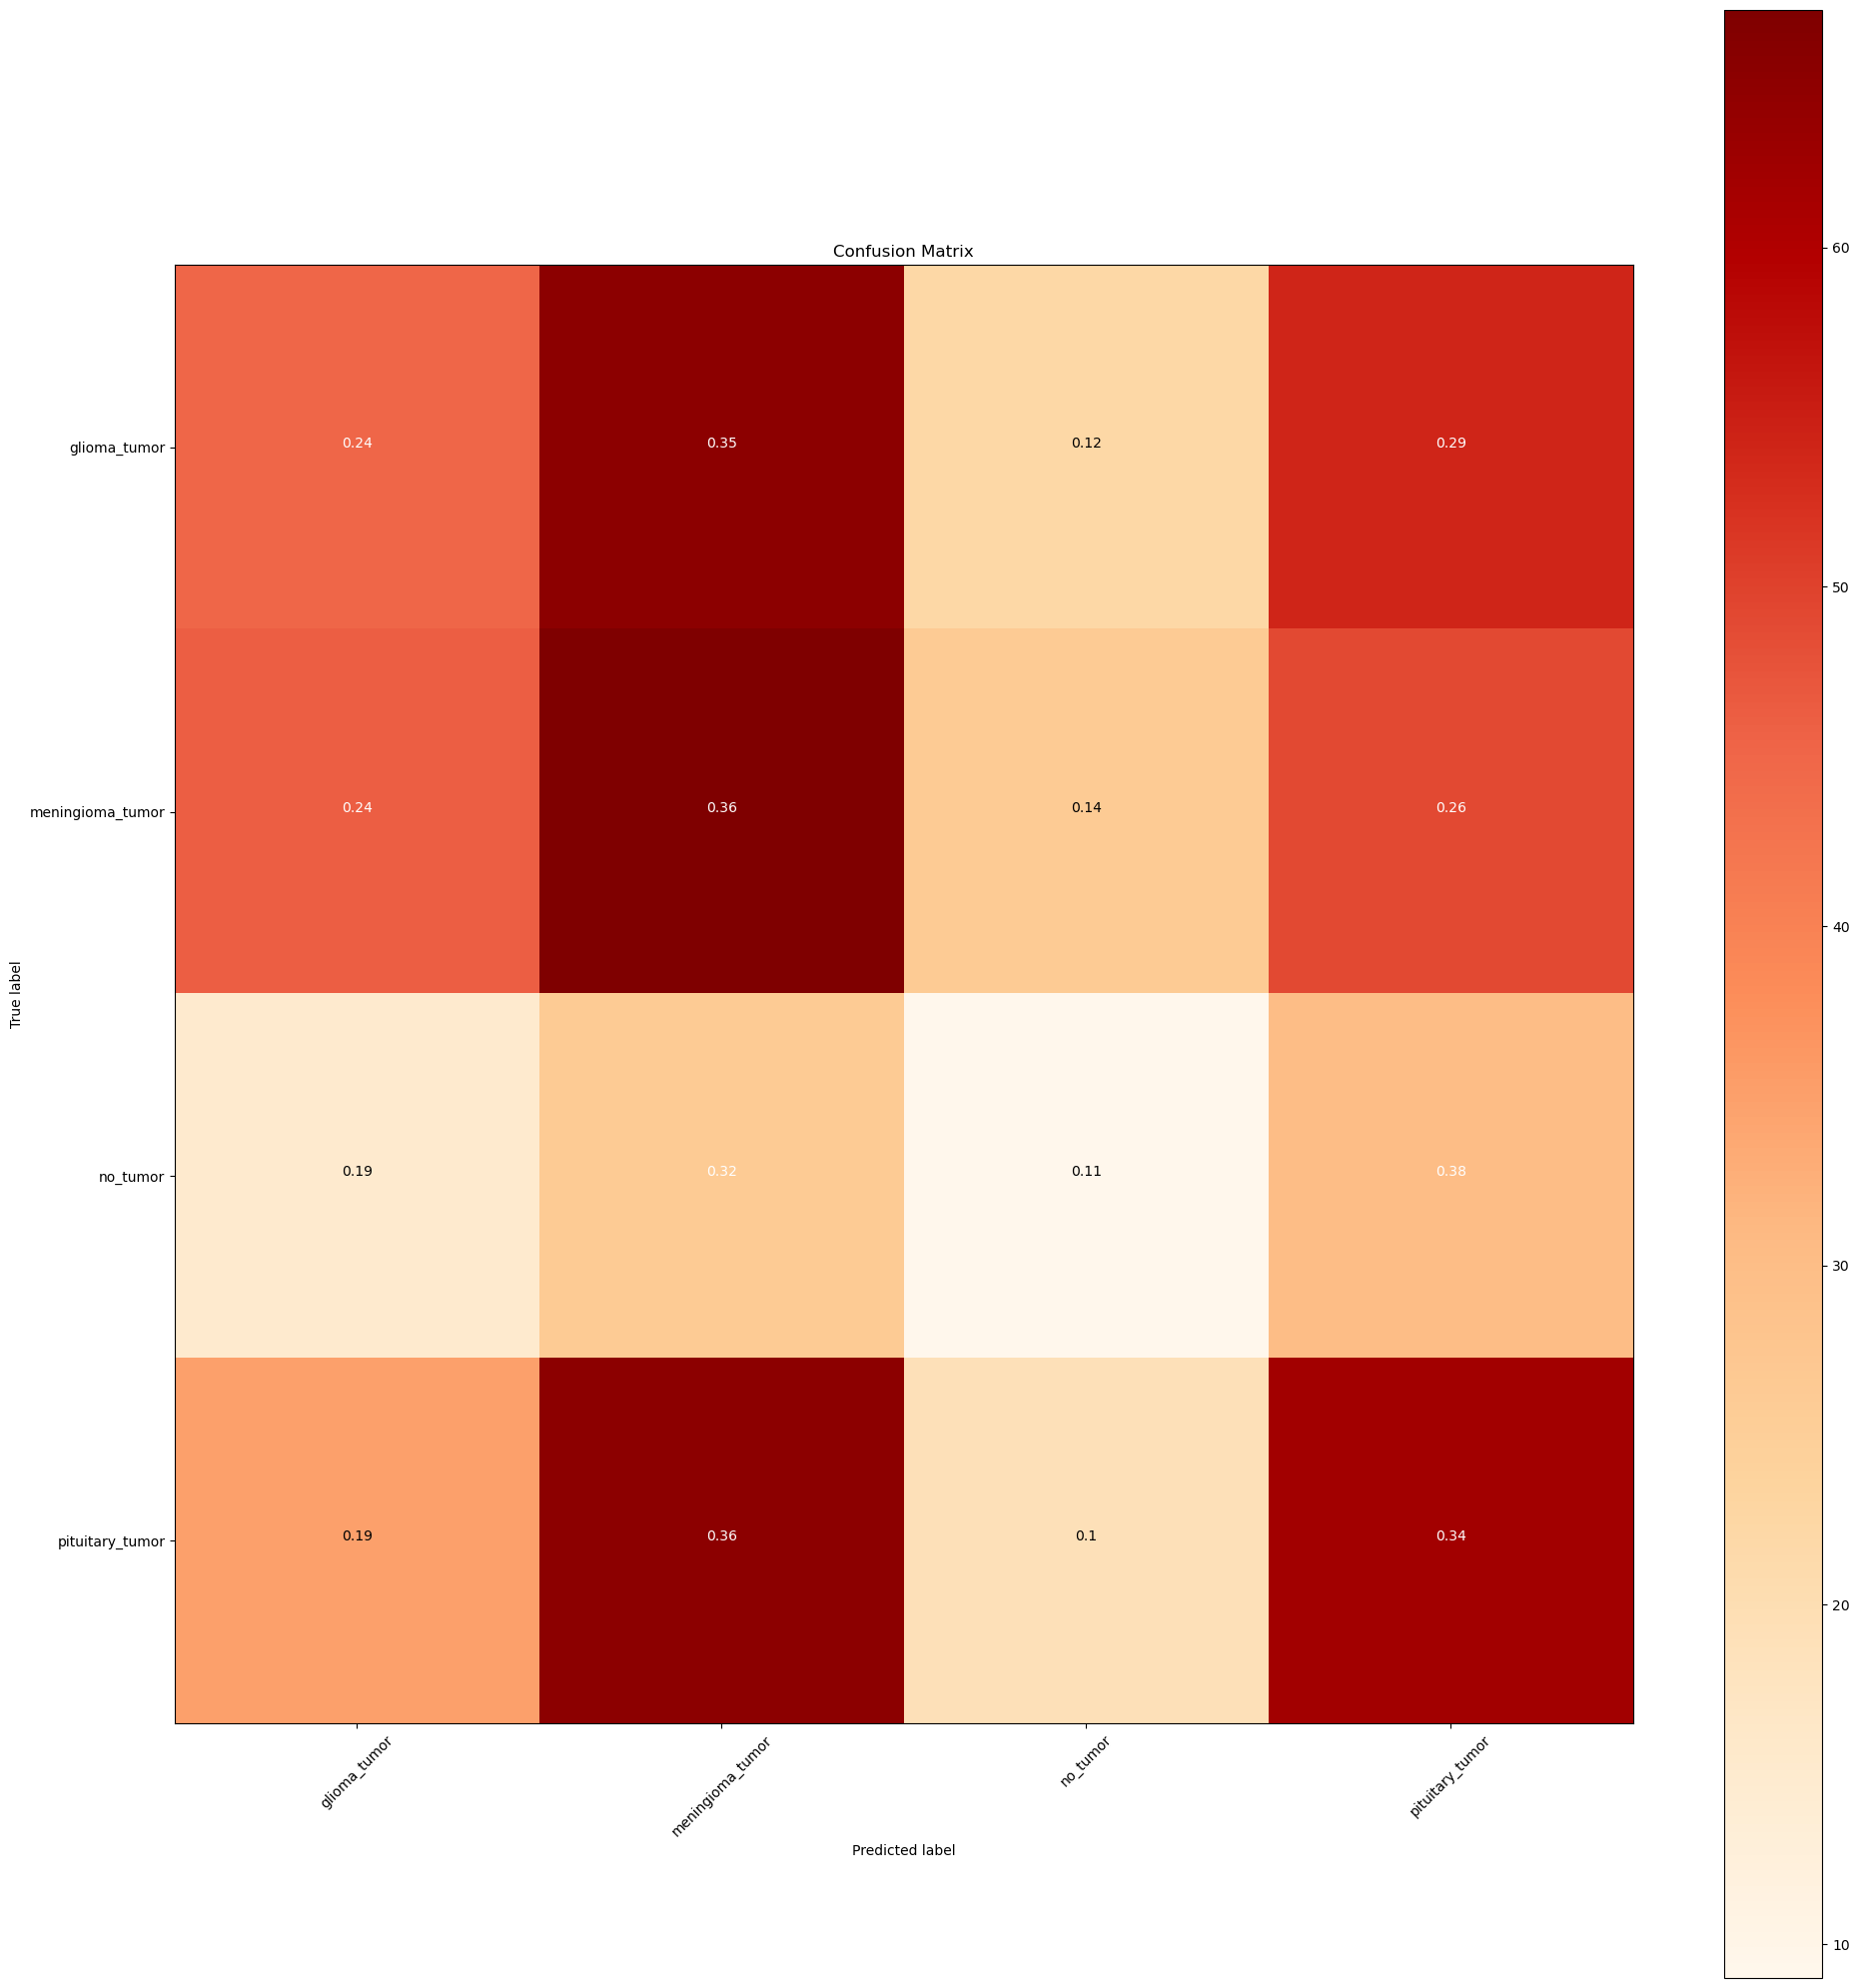

In [78]:
from sklearn.metrics import classification_report, confusion_matrix
import itertools 
#shuffle=False
target_names = []
for key in training_set.class_indices:
    target_names.append(key)

Y_pred = model.predict_generator(test_set)
y_pred = np.argmax(Y_pred, axis=1)
print('Confusion Matrix')
cm = confusion_matrix(test_set.classes, y_pred)
plot_confusion_matrix(cm, target_names, title='Confusion Matrix')

print('Classification Report')
print(classification_report(test_set.classes, y_pred, target_names=target_names))